# Value Factor

This notebook is used to create factor from stock universe with guidance of Amundi.


There is no single way to define value factor. In this notebook we use many parameters to make factor. Then we analyse the factor in terms of performance and sector loadings.

Value factor performs well in recovery of the economy, because prices have just surged but companies that are good still exist.

Value trap: cheap stocks that do not appreciate. Real value companies should have strong fundamentals

## Universe

In [256]:
import numpy as np
import pandas as pd

We choose Europian Stocks as investment universe. MSCI EU index. The data was retrived from Bloomberg. For downloading need only filters

In [257]:
# cap-weighted MSCI EU
universe = pd.read_excel('data/UNIVERS Jan2025 Data.xlsx', header=1, index_col=1)

In [258]:
universe_initial = pd.read_excel('data/UNIVERS Jan2025 Data.xlsx', header=1, index_col=1)

In [259]:
universe.head()

,Ticker,Weight,id_isin,PX_LAST,Trail_12M_EPS,DVD_SH_12M,BOOK_VAL_PER_SH,TRAIL_12M_SALES_PER_SH,INDUSTRY_SECTOR,GICS_SECTOR_NAME,COUNTRY,COUNTRY_FULL_NAME,CUR_MKT_CAP,Performance,ROE
Name,,,,,,,,,,,,,,,
ASML Holding NV,ASML NA Equity,0.076723,NL0010273215,777.40,19.910000,5.96,33.665714,69.986473,Technology,Information Technology,NE,NETHERLANDS,3.105571e+11,35.311638,70.421460
LVMH Moet Hennessy Louis Vuitton SE,MC FP Equity,0.046714,FR0000121014,684.10,32.006717,12.5,115.570259,169.046981,"Consumer, Cyclical",Consumer Discretionary,FR,FRANCE,3.429493e+11,7.898212,26.133232
SAP SE,SAP GY Equity,0.041312,DE0007164600,160.50,3.112258,2.05,35.096338,26.731540,Technology,Information Technology,GE,GERMANY,1.971749e+11,44.703804,8.976975
TotalEnergies SE,TTE FP Equity,0.033010,FR0000120271,58.75,7.396071,2.91,45.368934,86.061556,Energy,Energy,FR,FRANCE,1.417198e+11,5.029833,19.247571
Siemens AG,SIE GY Equity,0.031309,DE0007236101,167.28,10.099221,4.25,60.499791,99.133121,Industrial,Industrials,GE,GERMANY,1.338240e+11,31.070662,16.413959


## Clean the data

In [260]:
universe = universe.dropna()
universe.Weight.sum()

0.950985295588677

In [261]:
cap_msci = universe['CUR_MKT_CAP'].sum()

## What to use:

- ROE
- ROA
- Gross Margin
- High Margin
- Low Financial Leverage

In [262]:
universe.loc[:,'Earnings Yield'] = 100 * universe.loc[:,'Trail_12M_EPS'] / universe.loc[:,'PX_LAST']

In [263]:
universe.loc[:,'Book Yield'] = 100 * universe.loc[:,'BOOK_VAL_PER_SH'] / universe.loc[:,'PX_LAST']

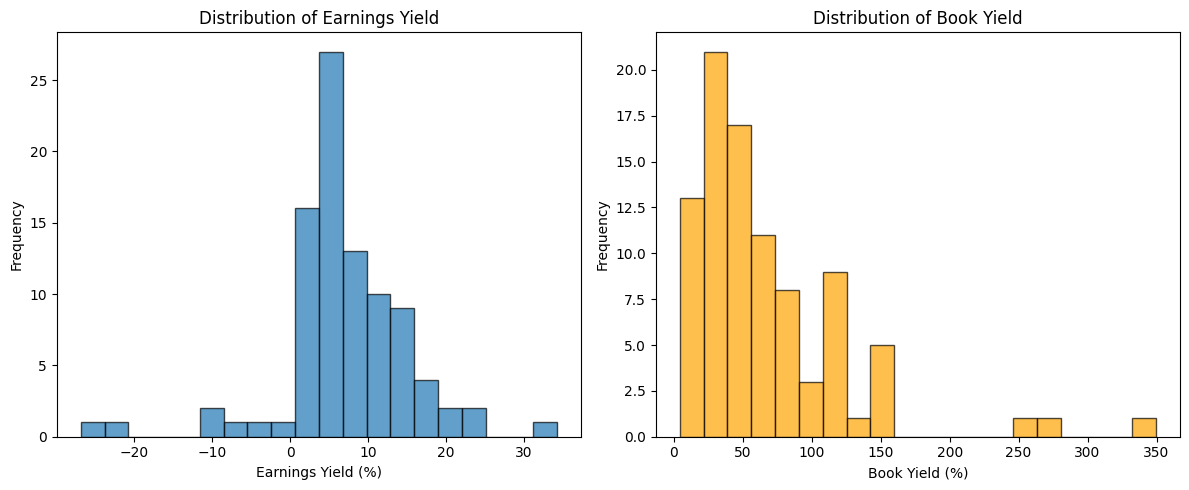

In [264]:
import matplotlib.pyplot as plt

# Extract Earnings Yield and Book Yield data
earnings_yield = universe["Earnings Yield"].dropna()
book_yield = universe["Book Yield"].dropna()

# Create histograms
plt.figure(figsize=(12, 5))

# Earnings Yield Histogram
plt.subplot(1, 2, 1)
plt.hist(earnings_yield, bins=20, edgecolor='black', alpha=0.7)
plt.title("Distribution of Earnings Yield")
plt.xlabel("Earnings Yield (%)")
plt.ylabel("Frequency")

# Book Yield Histogram
plt.subplot(1, 2, 2)
plt.hist(book_yield, bins=20, edgecolor='black', alpha=0.7, color='orange')
plt.title("Distribution of Book Yield")
plt.xlabel("Book Yield (%)")
plt.ylabel("Frequency")

# Show plots
plt.tight_layout()
plt.show()

## Hierarky of stocks

find percentiles & then normalize their scores. 
percentile of each stock -> for both ratios -> combine by mean -> normalize -> take 1st quantile of the score

In [265]:
universe.loc[:,"EY_percentile"] = universe["Earnings Yield"].rank(ascending=False, method = "max") / len(universe["Earnings Yield"])*100
universe.loc[:,'sorted_BY'] = universe["Book Yield"].rank(ascending=False, method = "max") / len(universe["Book Yield"])*100
universe

,Ticker,Weight,id_isin,PX_LAST,Trail_12M_EPS,DVD_SH_12M,BOOK_VAL_PER_SH,TRAIL_12M_SALES_PER_SH,INDUSTRY_SECTOR,GICS_SECTOR_NAME,COUNTRY,COUNTRY_FULL_NAME,CUR_MKT_CAP,Performance,ROE,Earnings Yield,Book Yield,EY_percentile,sorted_BY
Name,,,,,,,,,,,,,,,,,,,
ASML Holding NV,ASML NA Equity,0.076723,NL0010273215,777.400,19.910000,5.96,33.665714,69.986473,Technology,Information Technology,NE,NETHERLANDS,3.105571e+11,35.311638,70.421460,2.561101,4.330552,84.615385,100.000000
LVMH Moet Hennessy Louis Vuitton SE,MC FP Equity,0.046714,FR0000121014,684.100,32.006717,12.5,115.570259,169.046981,"Consumer, Cyclical",Consumer Discretionary,FR,FRANCE,3.429493e+11,7.898212,26.133232,4.678661,16.893767,63.736264,86.813187
SAP SE,SAP GY Equity,0.041312,DE0007164600,160.500,3.112258,2.05,35.096338,26.731540,Technology,Information Technology,GE,GERMANY,1.971749e+11,44.703804,8.976975,1.939102,21.866877,90.109890,85.714286
TotalEnergies SE,TTE FP Equity,0.033010,FR0000120271,58.750,7.396071,2.91,45.368934,86.061556,Energy,Energy,FR,FRANCE,1.417198e+11,5.029833,19.247571,12.589057,77.223717,20.879121,30.769231
Siemens AG,SIE GY Equity,0.031309,DE0007236101,167.280,10.099221,4.25,60.499791,99.133121,Industrial,Industrials,GE,GERMANY,1.338240e+11,31.070662,16.413959,6.037315,36.166781,51.648352,67.032967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Dr Ing hc F Porsche AG,P911 GY Equity,0.002101,DE000PAG9113,75.380,11.430117,1.01,45.589462,90.064869,"Consumer, Cyclical",Consumer Discretionary,GE,GERMANY,6.867118e+10,-15.672821,24.783458,15.163328,60.479520,10.989011,42.857143
Endesa SA,ELE SQ Equity,0.001500,ES0130670112,18.670,1.839808,2.0854,6.853926,25.961695,Utilities,Utilities,SP,SPAIN,1.976690e+10,4.678190,46.453382,9.854355,36.710904,30.769231,65.934066
Bayerische Motoren Werke AG,BMW3 GY Equity,0.001300,DE0005190037,87.600,17.286032,8.52,138.405785,237.095355,"Consumer, Cyclical",Consumer Discretionary,GE,GERMANY,5.953467e+10,13.073528,22.219195,19.732913,157.997472,4.395604,4.395604


In [266]:
universe.loc[:,'Mean_Value_Score'] = (universe.loc[:,"EY_percentile"] + universe.loc[:,'sorted_BY'])/2
universe.loc[:,'Mean_Value_Score_Percentile'] = universe.loc[:,'Mean_Value_Score'].rank(ascending=False,
                                                                                        method = "max") / len(universe["Earnings Yield"])*100

In [267]:
universe.loc[:,'Mean_Value_Score_Percentile_Normalized'] = (universe.loc[:,'Mean_Value_Score_Percentile'] - universe.loc[:,'Mean_Value_Score_Percentile'].mean()) / universe.loc[:,'Mean_Value_Score_Percentile'].std()

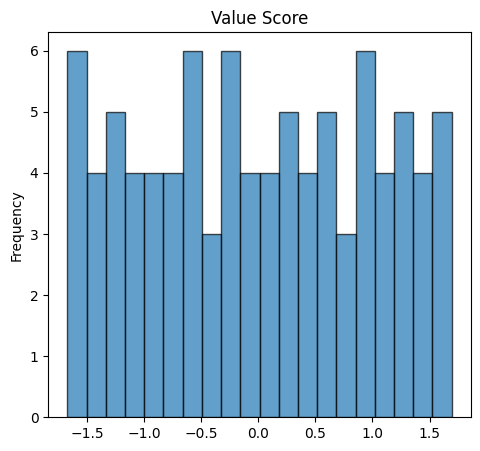

In [268]:
# Create histograms
plt.figure(figsize=(12, 5))

# Earnings Yield Histogram
plt.subplot(1, 2, 1)
plt.hist(universe.loc[:,'Mean_Value_Score_Percentile_Normalized'], bins=20, edgecolor='black', alpha=0.7)
plt.title("Value Score")
plt.ylabel("Frequency");

In [269]:
treshold = universe.loc[:,'Mean_Value_Score_Percentile_Normalized'].quantile(0.8)
universe.loc[:,'Mean_Value_Score_Percentile_Normalized'][universe.loc[:,'Mean_Value_Score_Percentile_Normalized']>treshold]

Name
BNP Paribas SA                        1.240235
Banco Santander SA                    1.504902
Banco Bilbao Vizcaya Argentaria SA    1.164616
Mercedes-Benz Group AG                1.542712
ING Groep NV                          1.202426
Intesa Sanpaolo SpA                   1.126807
UniCredit SpA                         1.353664
Stellantis NV                         1.580521
Eni SpA                               1.051188
Bayerische Motoren Werke AG           1.429283
Volkswagen AG                         1.693950
RWE AG                                1.353664
Societe Generale SA                   1.504902
CaixaBank SA                          1.278045
KBC Group NV                          1.088997
Credit Agricole SA                    1.391473
ArcelorMittal SA                      1.656140
Bayerische Motoren Werke AG           1.656140
Name: Mean_Value_Score_Percentile_Normalized, dtype: float64

In [270]:
universe.loc[:,'Mean_Value_Score_Percentile_Normalized'][universe.loc[:,'Mean_Value_Score_Percentile_Normalized']>treshold].sort_values(ascending= False)

Name
Volkswagen AG                         1.693950
Bayerische Motoren Werke AG           1.656140
ArcelorMittal SA                      1.656140
Stellantis NV                         1.580521
Mercedes-Benz Group AG                1.542712
Societe Generale SA                   1.504902
Banco Santander SA                    1.504902
Bayerische Motoren Werke AG           1.429283
Credit Agricole SA                    1.391473
UniCredit SpA                         1.353664
RWE AG                                1.353664
CaixaBank SA                          1.278045
BNP Paribas SA                        1.240235
ING Groep NV                          1.202426
Banco Bilbao Vizcaya Argentaria SA    1.164616
Intesa Sanpaolo SpA                   1.126807
KBC Group NV                          1.088997
Eni SpA                               1.051188
Name: Mean_Value_Score_Percentile_Normalized, dtype: float64

In [271]:
selected_stocks = universe.loc[:,'Mean_Value_Score_Percentile_Normalized'][universe.loc[:,'Mean_Value_Score_Percentile_Normalized']>treshold].index

# Building portfolio

In [272]:
value_unverse = universe.loc[list(set(selected_stocks)),["CUR_MKT_CAP",'GICS_SECTOR_NAME','Performance','ROE']]

In [273]:
value_unverse['value_portfolio_weight'] = value_unverse['CUR_MKT_CAP'] / np.sum(value_unverse['CUR_MKT_CAP'])

In [274]:
value_unverse

,CUR_MKT_CAP,GICS_SECTOR_NAME,Performance,ROE,value_portfolio_weight
Name,,,,,
Bayerische Motoren Werke AG,5.953467e+10,Consumer Discretionary,20.868313,22.219195,0.070756
Bayerische Motoren Werke AG,5.953467e+10,Consumer Discretionary,13.073528,22.219195,0.070756
Volkswagen AG,6.165513e+10,Consumer Discretionary,-3.968388,10.571450,0.073276
BNP Paribas SA,7.108623e+10,Financials,17.539906,6.290056,0.084485
Banco Bilbao Vizcaya Argentaria SA,4.794117e+10,Financials,46.006393,15.009388,0.056977
Mercedes-Benz Group AG,6.425662e+10,Consumer Discretionary,1.872957,18.429648,0.076368
RWE AG,2.727666e+10,Utilities,-0.985813,12.687369,0.032418
KBC Group NV,2.523866e+10,Financials,-2.263647,13.173858,0.029996
Credit Agricole SA,4.079069e+10,Financials,30.729330,8.049322,0.048479


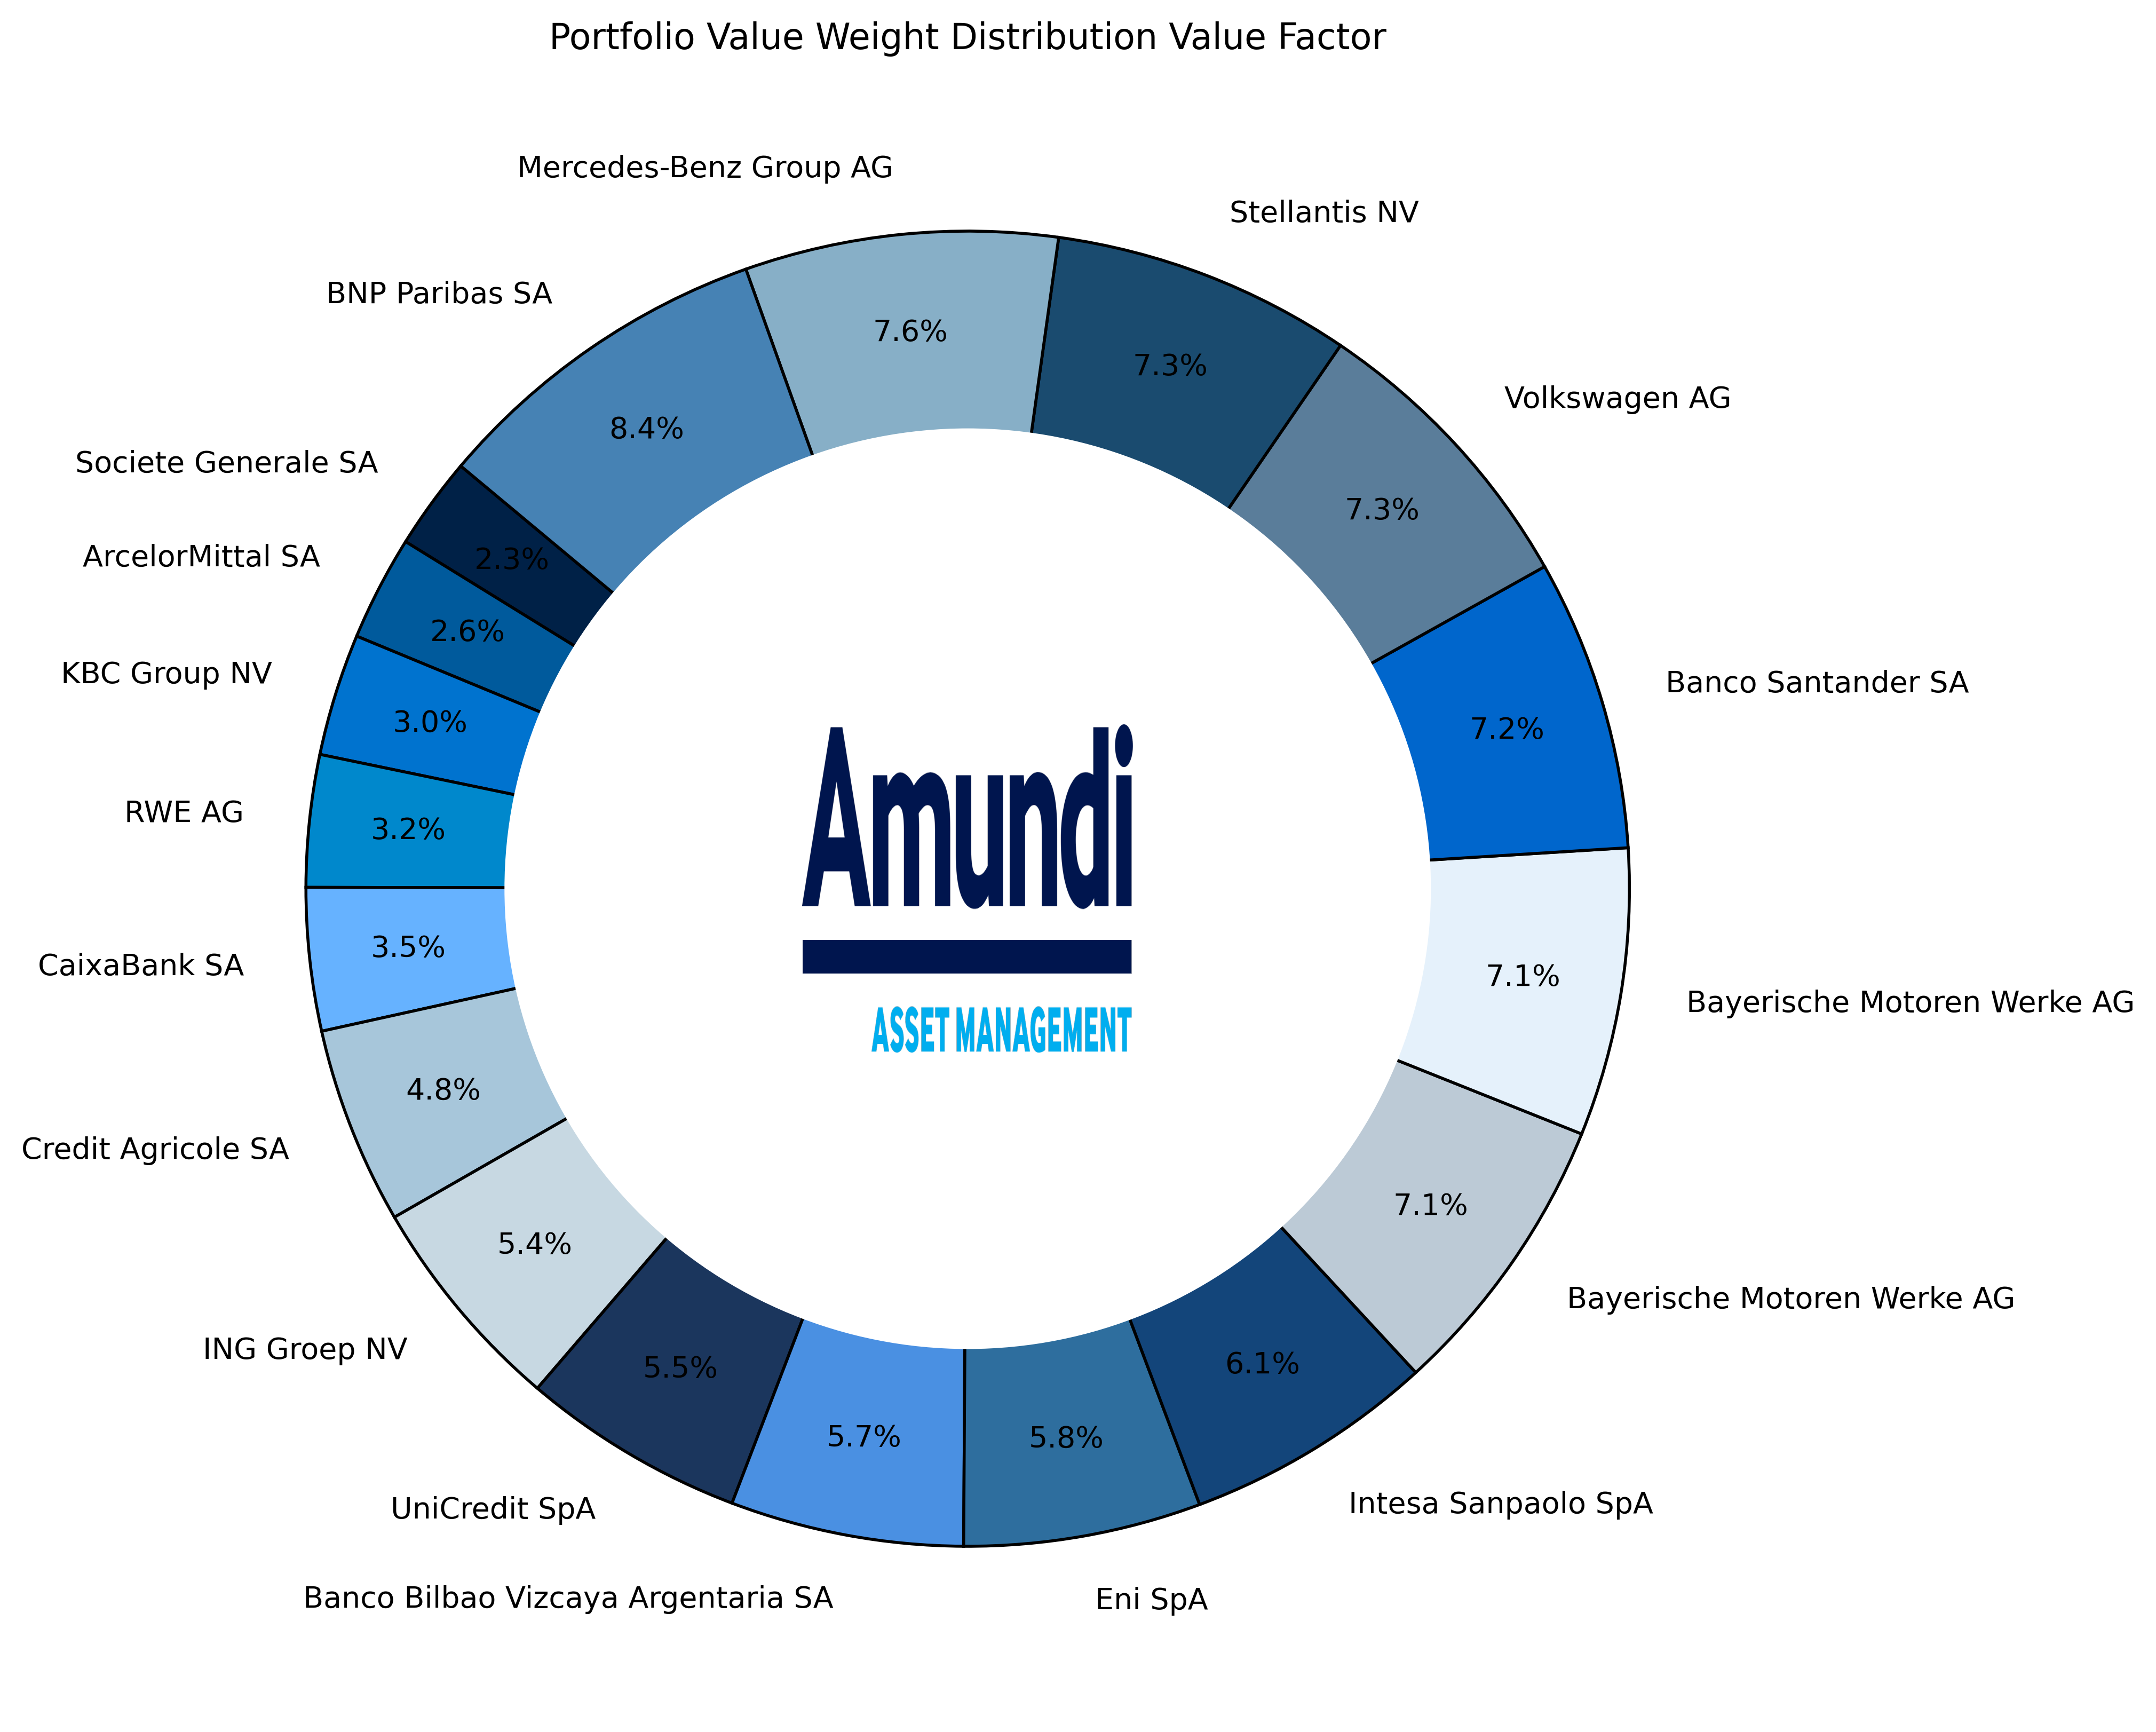

In [275]:
import matplotlib.image as mpimg

amundi_colors = [
    "#002147",  # Deep Blue (Main Amundi Color)
    "#005A9C",  # Medium Blue
    "#0073CF",  # Royal Blue
    "#0088CC",  # Light Blue
    "#66B2FF",  # Sky Blue
    "#A7C6DA",  # Soft Blue
    "#C7D8E2",  # Very Light Blue
    "#1B365D",  # Deep Navy
    "#4A90E2",  # Brighter Blue
    "#2E6E9E",  # Steel Blue
    "#13457A",  # Dark Blue
    "#BCCAD6",  # Greyish Blue
    "#E5F1FB",  # Pale Blue
    "#0066CC",  # Amundi Bright Blue
    "#5A7D9A",  # Muted Steel Blue
    "#1A4B6F",  # Dark Teal Blue
    "#87AFC7",  # Metallic Blue
    "#4682B4",  # Steel Blue
    "#6E8FAF",  # Business Blue
    "#A0B5D6"   # Soft Investor Blue
]


df = value_unverse.copy().sort_values(by = 'value_portfolio_weight')
plt.figure(figsize=(10, 10), dpi = 400)
plt.pie(
    df["value_portfolio_weight"],
    labels=df.index,
    autopct='%1.1f%%',
    colors=amundi_colors[:len(df)],
    startangle=140,
    wedgeprops={'edgecolor': 'black'},
    pctdistance=0.85
)

# Add a title
plt.title("Portfolio Value Weight Distribution Value Factor")

# Draw a circle at the center to make it a donut chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
plt.gca().add_artist(centre_circle)


# Add Amundi logo in the center
logo = mpimg.imread("data/amundi_logo.png")
plt.imshow(logo, extent=[-0.25, 0.25, -0.25, 0.25], aspect='auto', zorder=10)  # Adjusted size for better fit


# Show the chart

plt.savefig("portfolio_value_weight_distribution.png", bbox_inches='tight', dpi=400)

In [278]:
sector_weighting = value_unverse.groupby(by = 'GICS_SECTOR_NAME').sum()

In [279]:
sector_weighting

,CUR_MKT_CAP,Performance,ROE,value_portfolio_weight
GICS_SECTOR_NAME,,,,
Consumer Discretionary,3.066527e+11,91.300565,99.707216,0.364452
Energy,4.878230e+10,15.520096,31.138168,0.057977
Financials,4.370354e+11,261.742129,101.822080,0.519409
Materials,2.166137e+10,4.476082,19.228458,0.025744
Utilities,2.727666e+10,-0.985813,12.687369,0.032418


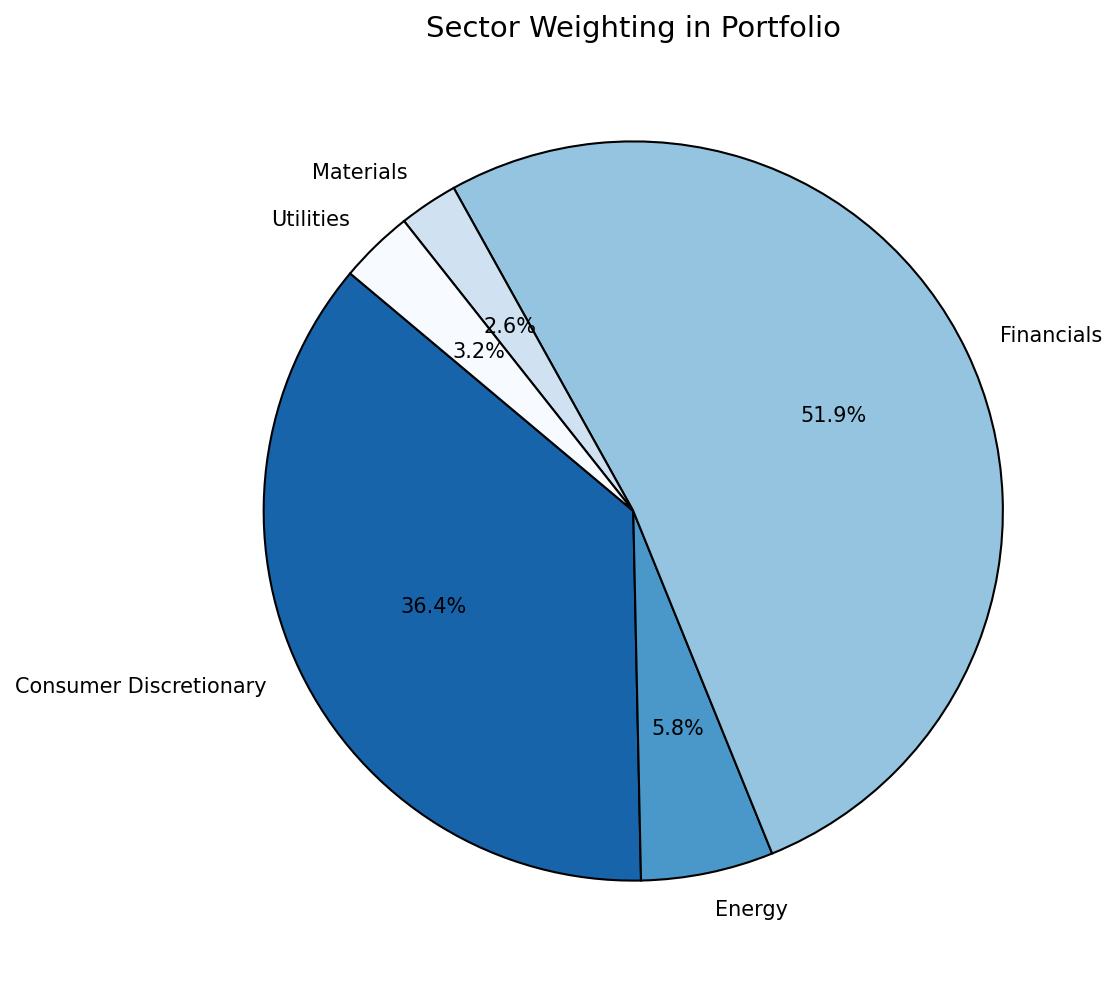

In [280]:
colors = plt.cm.Blues_r([0.2, 0.4, 0.6, 0.8, 1.0])

plt.figure(figsize=(8, 8), dpi = 150)
plt.pie(sector_weighting["value_portfolio_weight"], labels=sector_weighting.index, 
        autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops={'edgecolor': 'black'})

# Title
plt.title("Sector Weighting in Portfolio", fontsize=14)

# Show plot
plt.show()

In [281]:
sector_weighting_initial_universe = universe_initial.loc[:,['GICS_SECTOR_NAME','CUR_MKT_CAP']].groupby(by = 'GICS_SECTOR_NAME').sum()
sector_weighting_initial_universe['portfolio_weight'] = sector_weighting_initial_universe['CUR_MKT_CAP'] / sector_weighting_initial_universe['CUR_MKT_CAP'].sum()

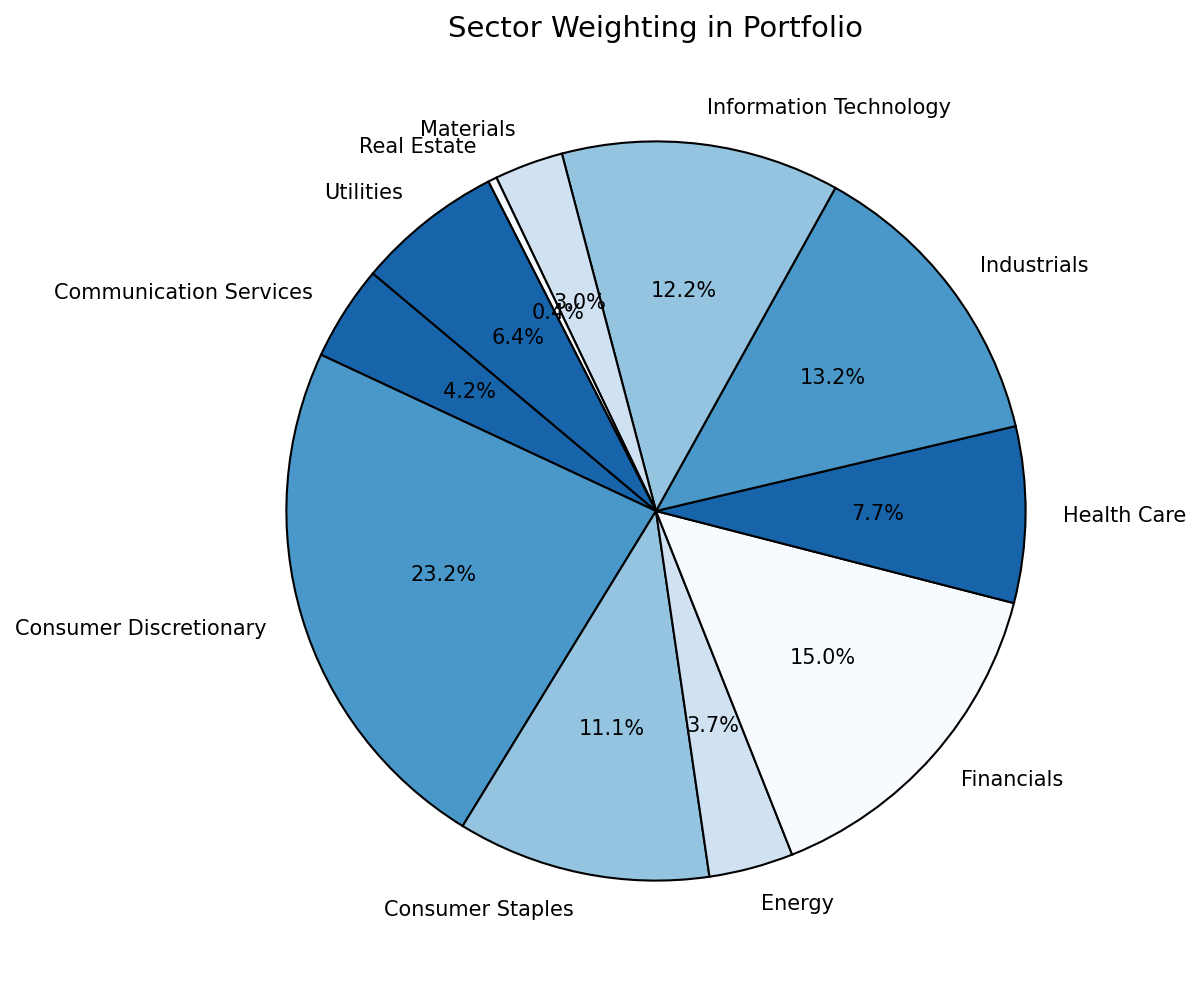

In [282]:
plt.figure(figsize=(8, 8), dpi = 150)
plt.pie(sector_weighting_initial_universe['portfolio_weight'], labels=sector_weighting_initial_universe.index, 
        autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops={'edgecolor': 'black'})

# Title
plt.title("Sector Weighting in Portfolio", fontsize=14)

# Show plot
plt.show()

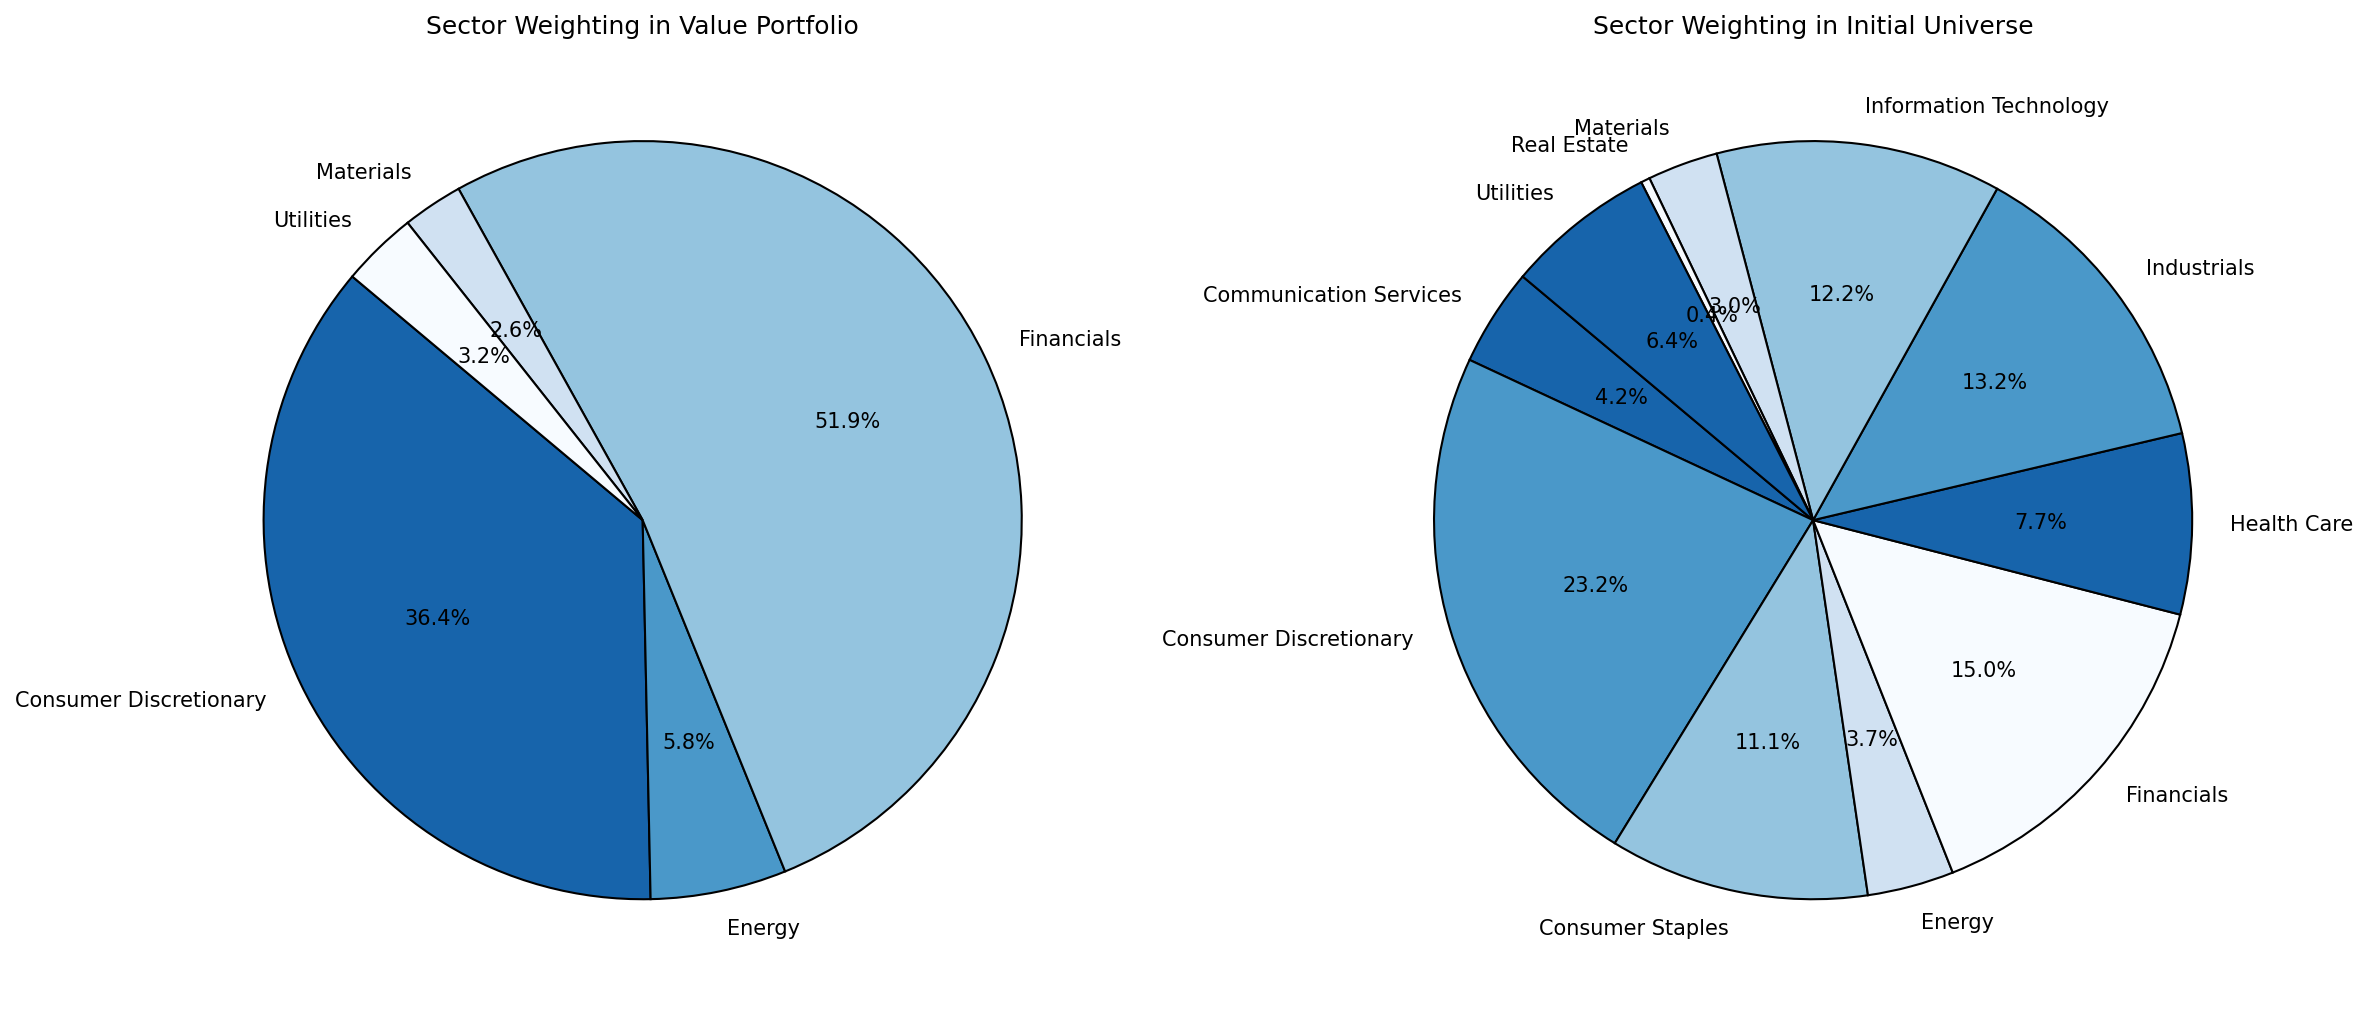

In [286]:
import matplotlib.pyplot as plt
import pandas as pd

# Create subplots for side-by-side comparison
fig, axes = plt.subplots(1, 2, figsize=(16, 8), dpi=150)

# Pie chart 1: sector_weighting
axes[0].pie(sector_weighting["value_portfolio_weight"], labels=sector_weighting.index, 
            autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops={'edgecolor': 'black'})
axes[0].set_title("Sector Weighting in Value Portfolio")

# Pie chart 2: sector_weighting_initial_universe
axes[1].pie(sector_weighting_initial_universe['portfolio_weight'], labels=sector_weighting_initial_universe.index, 
            autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops={'edgecolor': 'black'})
axes[1].set_title("Sector Weighting in Initial Universe")

# Show plot
plt.tight_layout()

plt.savefig("pie_charts_value_before_after.png", bbox_inches='tight', dpi=600)

In [287]:
sector_weighting

,CUR_MKT_CAP,Performance,ROE,value_portfolio_weight
GICS_SECTOR_NAME,,,,
Consumer Discretionary,3.066527e+11,91.300565,99.707216,0.364452
Energy,4.878230e+10,15.520096,31.138168,0.057977
Financials,4.370354e+11,261.742129,101.822080,0.519409
Materials,2.166137e+10,4.476082,19.228458,0.025744
Utilities,2.727666e+10,-0.985813,12.687369,0.032418


In [288]:
for i in ['Industrials',
 'Real Estate',
 'Information Technology',
 'Consumer Staples',
 'Communication Services',
 'Health Care']:
    sector_weighting.loc[i,['CUR_MKT_CAP','value_portfolio_weight']] = 0
    

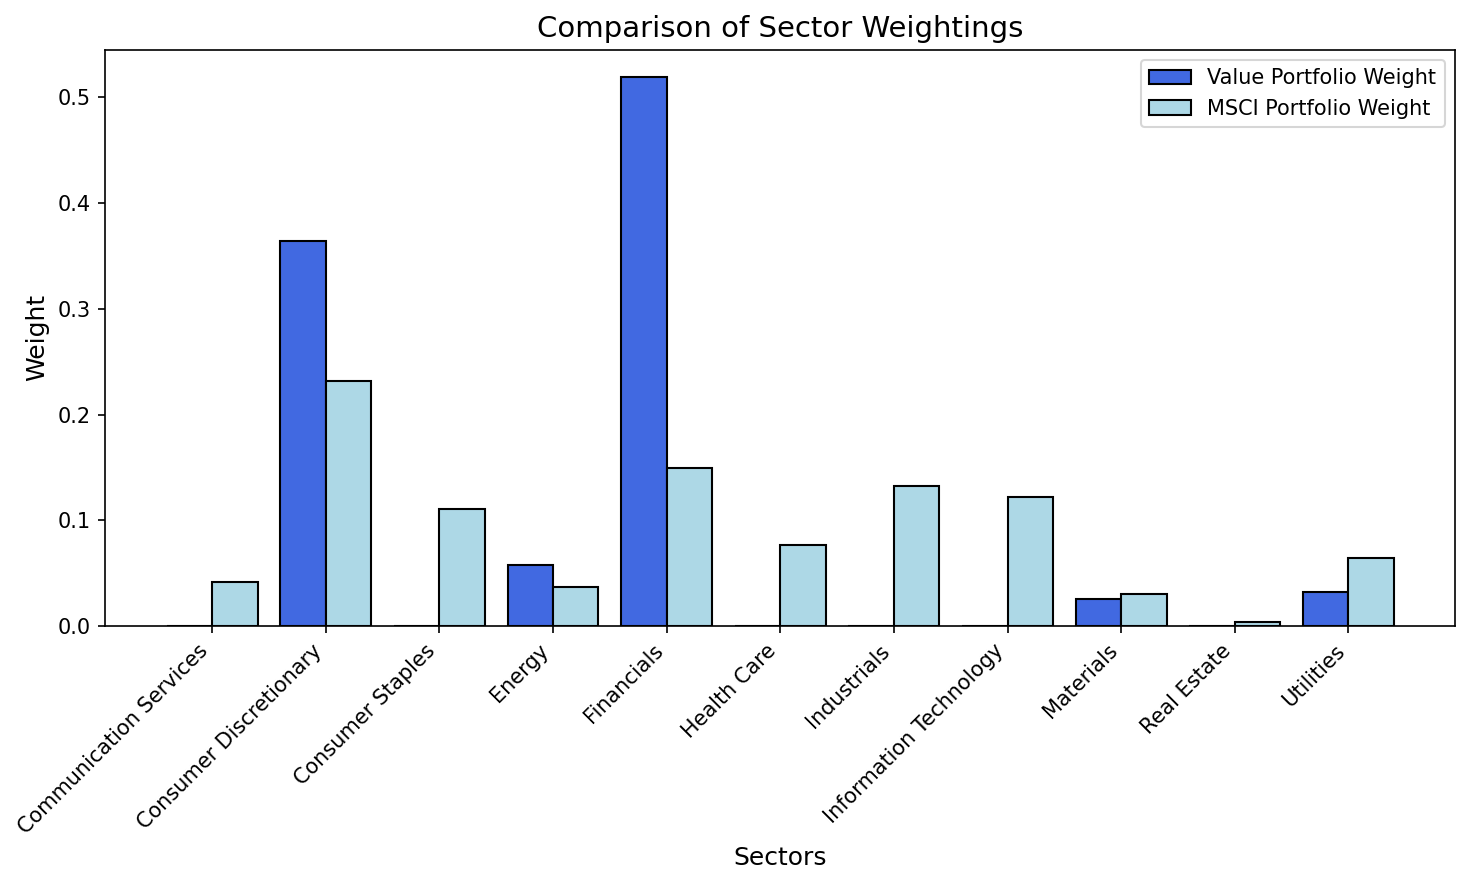

In [291]:
import numpy as np

# Define sector names
sectors = sector_weighting_initial_universe.index

# Define values for both portfolio weights
portfolio_weights = sector_weighting.loc[sector_weighting_initial_universe.index,"value_portfolio_weight"].values
initial_weights = sector_weighting_initial_universe.loc[sector_weighting_initial_universe.index,"portfolio_weight"].values

# Define positions for bars
x = np.arange(len(sectors))

# Create the bar chart
plt.figure(figsize=(10, 6), dpi=150)
bar_width = 0.4

plt.bar(x - bar_width/2, portfolio_weights, bar_width, label="Value Portfolio Weight", color='royalblue', edgecolor='black')
plt.bar(x + bar_width/2, initial_weights, bar_width, label="MSCI Portfolio Weight", color='lightblue', edgecolor='black')

# Labels and title
plt.xlabel("Sectors", fontsize=12)
plt.ylabel("Weight", fontsize=12)
plt.title("Comparison of Sector Weightings", fontsize=14)
plt.xticks(ticks=x, labels=sectors, rotation=45, ha="right")
plt.legend()

# Show plot
plt.tight_layout()


plt.savefig("bar_charts_value_sector_weights.png", bbox_inches='tight', dpi=600)

## Comparing portfolio ratios

Performance	ROE	price-to-book. Know if my portfolio outperform or underperform benchmark.

In [252]:
initial_portfolio_ROE = np.sum(universe.loc[:,'Weight'] * universe.loc[:,'ROE'])
initial_portfolio_Performance = np.sum(universe.loc[:,'Weight'] * universe.loc[:,'Performance'])
initial_portfolio_BY = np.sum(universe.loc[:,'Weight'] * universe.loc[:,'Book Yield'])

value_unverse = universe.loc[list(set(selected_stocks)),:]
value_unverse['Weight'] = value_unverse['CUR_MKT_CAP'] / np.sum(value_unverse['CUR_MKT_CAP'])

value_universe_ROE = np.sum(value_unverse.loc[:,'Weight'] * value_unverse.loc[:,'ROE'])
value_universe_Performance = np.sum(value_unverse.loc[:,'Weight'] * value_unverse.loc[:,'Performance'])
value_universe_BY = np.sum(value_unverse.loc[:,'Weight'] * value_unverse.loc[:,'Book Yield'])

In [294]:
universe

,Ticker,Weight,id_isin,PX_LAST,Trail_12M_EPS,DVD_SH_12M,BOOK_VAL_PER_SH,TRAIL_12M_SALES_PER_SH,INDUSTRY_SECTOR,GICS_SECTOR_NAME,...,CUR_MKT_CAP,Performance,ROE,Earnings Yield,Book Yield,EY_percentile,sorted_BY,Mean_Value_Score,Mean_Value_Score_Percentile,Mean_Value_Score_Percentile_Normalized
Name,,,,,,,,,,,,,,,,,,,,,
ASML Holding NV,ASML NA Equity,0.076723,NL0010273215,777.400,19.910000,5.96,33.665714,69.986473,Technology,Information Technology,...,3.105571e+11,35.311638,70.421460,2.561101,4.330552,84.615385,100.000000,92.307692,4.395604,-1.595479
LVMH Moet Hennessy Louis Vuitton SE,MC FP Equity,0.046714,FR0000121014,684.100,32.006717,12.5,115.570259,169.046981,"Consumer, Cyclical",Consumer Discretionary,...,3.429493e+11,7.898212,26.133232,4.678661,16.893767,63.736264,86.813187,75.274725,20.879121,-1.028336
SAP SE,SAP GY Equity,0.041312,DE0007164600,160.500,3.112258,2.05,35.096338,26.731540,Technology,Information Technology,...,1.971749e+11,44.703804,8.976975,1.939102,21.866877,90.109890,85.714286,87.912088,8.791209,-1.444241
TotalEnergies SE,TTE FP Equity,0.033010,FR0000120271,58.750,7.396071,2.91,45.368934,86.061556,Energy,Energy,...,1.417198e+11,5.029833,19.247571,12.589057,77.223717,20.879121,30.769231,25.824176,79.120879,0.975569
Siemens AG,SIE GY Equity,0.031309,DE0007236101,167.280,10.099221,4.25,60.499791,99.133121,Industrial,Industrials,...,1.338240e+11,31.070662,16.413959,6.037315,36.166781,51.648352,67.032967,59.340659,41.758242,-0.309955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Dr Ing hc F Porsche AG,P911 GY Equity,0.002101,DE000PAG9113,75.380,11.430117,1.01,45.589462,90.064869,"Consumer, Cyclical",Consumer Discretionary,...,6.867118e+10,-15.672821,24.783458,15.163328,60.479520,10.989011,42.857143,26.923077,75.824176,0.862140
Endesa SA,ELE SQ Equity,0.001500,ES0130670112,18.670,1.839808,2.0854,6.853926,25.961695,Utilities,Utilities,...,1.976690e+10,4.678190,46.453382,9.854355,36.710904,30.769231,65.934066,48.351648,58.241758,0.257188
Bayerische Motoren Werke AG,BMW3 GY Equity,0.001300,DE0005190037,87.600,17.286032,8.52,138.405785,237.095355,"Consumer, Cyclical",Consumer Discretionary,...,5.953467e+10,13.073528,22.219195,19.732913,157.997472,4.395604,4.395604,4.395604,98.901099,1.656140


In [253]:
value_unverse_ROE

15.283515850539585

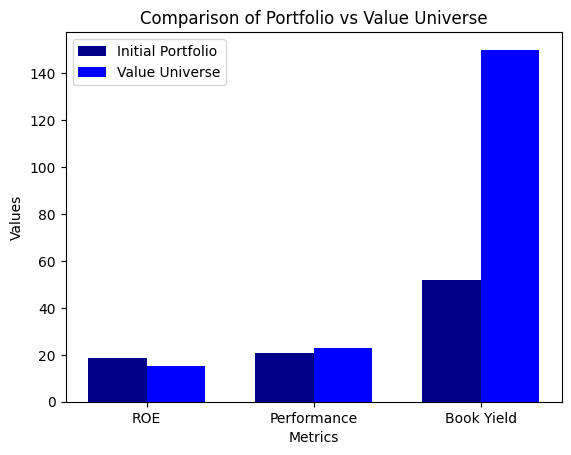

In [292]:
# Data for the bar chart
categories = ['ROE', 'Performance', 'Book Yield']
initial_portfolio_values = [initial_portfolio_ROE, initial_portfolio_Performance, initial_portfolio_BY]
value_universe_values = [value_universe_ROE, value_universe_Performance, value_universe_BY]

# Bar chart settings
x = np.arange(len(categories))  # the label locations
width = 0.35  # width of bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, initial_portfolio_values, width, label='Initial Portfolio', color = 'darkblue')
rects2 = ax.bar(x + width/2, value_universe_values, width, label='Value Universe', color = 'blue')

# Labels and formatting
ax.set_xlabel('Metrics')
ax.set_ylabel('Values')
ax.set_title('Comparison of Portfolio vs Value Universe')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

plt.savefig("performance_value_vs_market.png", bbox_inches='tight', dpi=600)